Code to train an Temporal Difference Error modulated Hebbian Learning (TDHL) agent to navigate to a target in a continuous 2D arena
Code by: M Ganesh Kumar & Blake Bordeleon
Date: 02/15/2024

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from backend import TwoDimNav, PC_AC_agent, plot_maps

In [14]:
train_episodes = 200
tmax = 100
maxspeed = 0.25
goalsize = 0.25
startcoord = [0.0,0.0]
goalcoord = [0.7, 0.7]
testgoalcoord = [-0.7,-0.7]

env = TwoDimNav(startcoord=startcoord, goalcoord=goalcoord, goalsize=goalsize, tmax=tmax, maxspeed=maxspeed)

[0.0, 0.0]


In [15]:
# initialize agent
alr = 0.001  # 0.0075
clr = 0.005  # 0.025
nact = 4
gamma = 0.95

npc = 21
pc_sigma = 0.25
seed = 2023
agent = PC_AC_agent(alr=alr, clr=clr, npc=npc, pcr=pc_sigma, nact=nact, seed=seed, gamma=gamma)

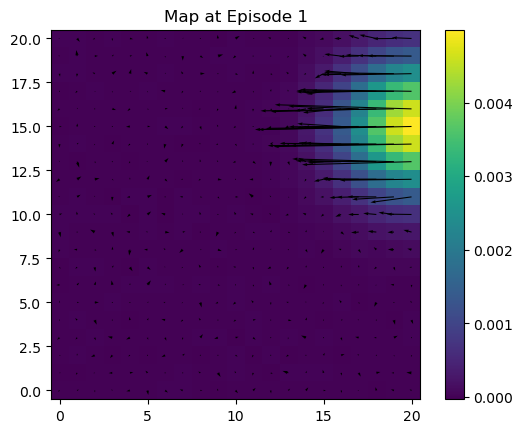

E 1/200 in 70 steps
E 2/200 in 30 steps
E 3/200 in 99 steps
E 4/200 in 64 steps
E 5/200 in 4 steps
E 6/200 in 85 steps
E 7/200 in 44 steps
E 8/200 in 99 steps
E 9/200 in 12 steps
E 10/200 in 6 steps
E 11/200 in 40 steps
E 12/200 in 99 steps
E 13/200 in 4 steps
E 14/200 in 73 steps
E 15/200 in 99 steps
E 16/200 in 23 steps
E 17/200 in 28 steps
E 18/200 in 35 steps
E 19/200 in 22 steps
E 20/200 in 13 steps
E 21/200 in 8 steps
E 22/200 in 4 steps
E 23/200 in 24 steps
E 24/200 in 8 steps
E 25/200 in 4 steps
E 26/200 in 85 steps
E 27/200 in 59 steps
E 28/200 in 75 steps
E 29/200 in 99 steps
E 30/200 in 32 steps
E 31/200 in 16 steps
E 32/200 in 46 steps
E 33/200 in 6 steps
E 34/200 in 16 steps
E 35/200 in 6 steps
E 36/200 in 14 steps
E 37/200 in 4 steps
E 38/200 in 4 steps
E 39/200 in 8 steps
E 40/200 in 8 steps
E 41/200 in 16 steps
E 42/200 in 14 steps
E 43/200 in 48 steps
E 44/200 in 8 steps
E 45/200 in 38 steps
E 46/200 in 17 steps
E 47/200 in 8 steps
E 48/200 in 6 steps
E 49/200 in 12 st

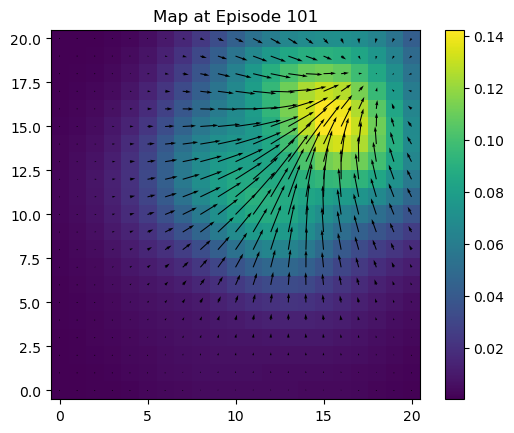

E 101/200 in 8 steps
E 102/200 in 8 steps
E 103/200 in 6 steps
E 104/200 in 4 steps
E 105/200 in 6 steps
E 106/200 in 6 steps
E 107/200 in 6 steps
E 108/200 in 4 steps
E 109/200 in 4 steps
E 110/200 in 6 steps
E 111/200 in 6 steps
E 112/200 in 4 steps
E 113/200 in 4 steps
E 114/200 in 4 steps
E 115/200 in 6 steps
E 116/200 in 4 steps
E 117/200 in 6 steps
E 118/200 in 4 steps
E 119/200 in 6 steps
E 120/200 in 4 steps
E 121/200 in 4 steps
E 122/200 in 4 steps
E 123/200 in 8 steps
E 124/200 in 4 steps
E 125/200 in 4 steps
E 126/200 in 10 steps
E 127/200 in 4 steps
E 128/200 in 4 steps
E 129/200 in 6 steps
E 130/200 in 6 steps
E 131/200 in 4 steps
E 132/200 in 4 steps
E 133/200 in 6 steps
E 134/200 in 4 steps
E 135/200 in 8 steps
E 136/200 in 6 steps
E 137/200 in 4 steps
E 138/200 in 4 steps
E 139/200 in 4 steps
E 140/200 in 8 steps
E 141/200 in 4 steps
E 142/200 in 4 steps
E 143/200 in 4 steps
E 144/200 in 4 steps
E 145/200 in 6 steps
E 146/200 in 4 steps
E 147/200 in 4 steps
E 148/200 in

In [16]:
latency = []
success = 0
tds = []

for e in range(train_episodes):
    state, goal, eucdist, done = env.reset()

    for t in range(tmax):

        onehotg = agent.get_action(state)

        # eucdist is euclediean distance to goal, done is a sparse scalar reward signal 
        newstate, eucdist, done = env.step(onehotg) 

        # use scalar sparse reward signal to update TD error
        agent.learn(newstate=newstate, reward=done)

        tds.append(agent.td)

        state = newstate.copy()

        if done:
            success+=1
            break
            
    if e % 100 == 0:
        plot_maps(env, npc, agent.wA, agent.wC, title=f'Map at Episode {e+1}')

    latency.append(t)
    #print(agent.wC.max(), agent.wA.max())
    print(f'E {e+1}/{train_episodes} in {t} steps')


print(f"Completion {success}/{train_episodes}")

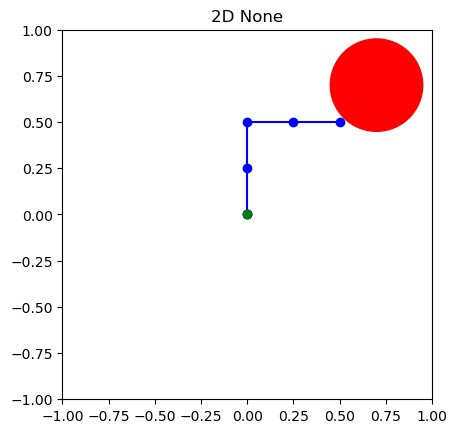

In [17]:
env.plot_trajectory()

Text(0.5, 1.0, 'Steps to reach target')

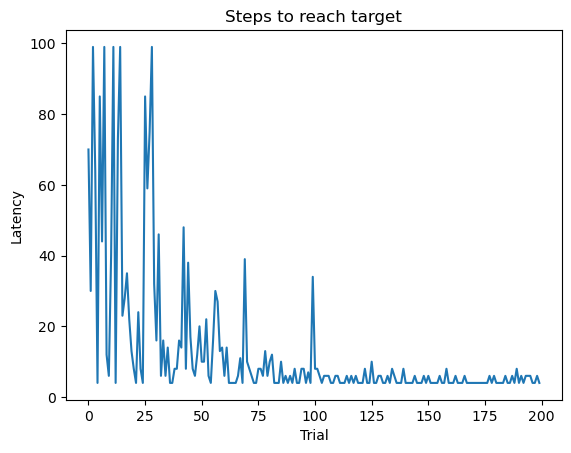

In [18]:
# plot latency to reach goal
plt.figure()
plt.plot(latency,label='Train')
plt.xlabel('Trial')
plt.ylabel('Latency')
plt.title(f"Steps to reach target")